# Customer Segmentation using Machine Learning

This notebook demonstrates how to perform customer segmentation using **KMeans clustering**. Customer segmentation helps businesses understand their target audience and deliver personalized services. We use a dataset containing basic demographic and spending data to group similar customers together.

# Customer Segmentation using Machine Learning

This notebook demonstrates how to perform customer segmentation using **KMeans clustering**. Customer segmentation helps businesses understand their target audience and deliver personalized services. We use a dataset containing basic demographic and spending data to group similar customers together.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
print(df.dtypes)
print(df.info())

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns 

In [6]:
columns = [column for column in df.columns if column != "ID"]

In [10]:
num=[x for x in columns if df[x].dtype!='O']
cat=[x for x in columns if df[x].dtype=='O']
print(f"No. of numeric columns is {len(num)}")
print(f"No. of categorical columns is {len(cat)}")

No. of numeric columns is 25
No. of categorical columns is 3


In [11]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [21]:
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

KeyError: "['Z_CostContact', 'Z_Revenue'] not found in axis"

KeyError: 'Z_CostContact'

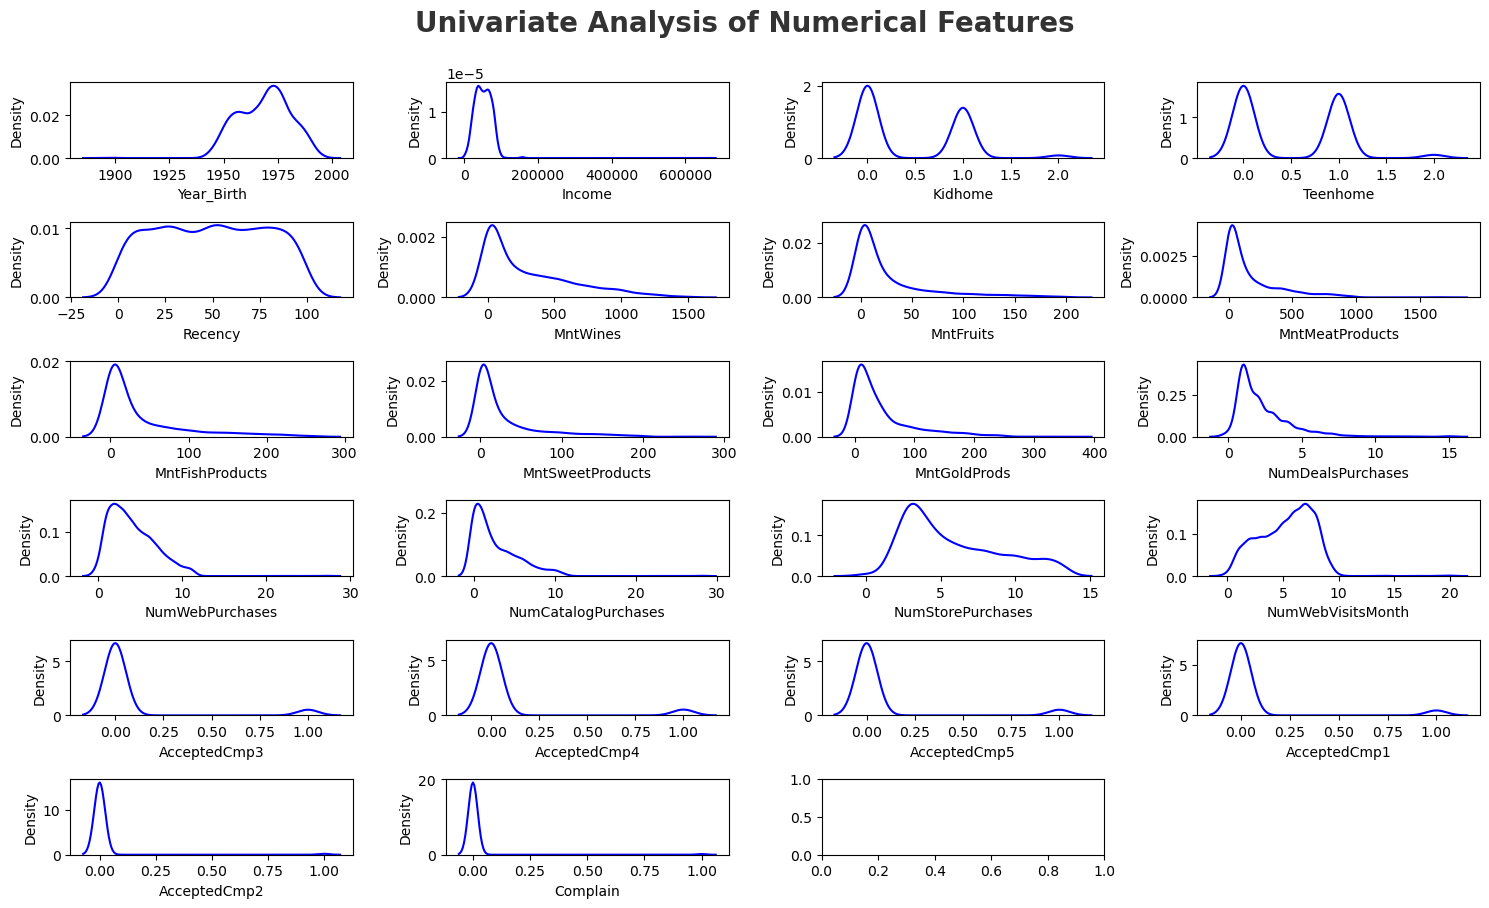

In [20]:
# Univariate Analysis - Numeric features
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num)):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(x=df[num[i]], color='blue')
    plt.xlabel(num[i])
    plt.tight_layout()
plt.show()

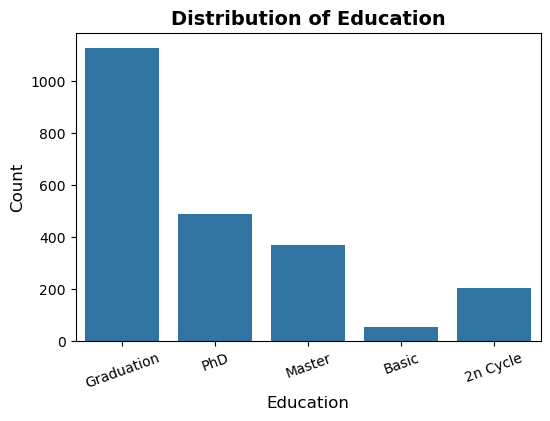

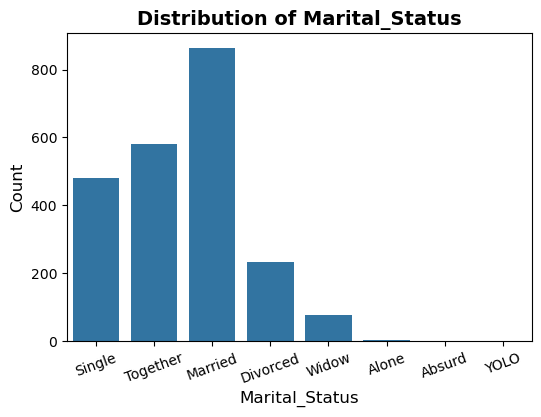

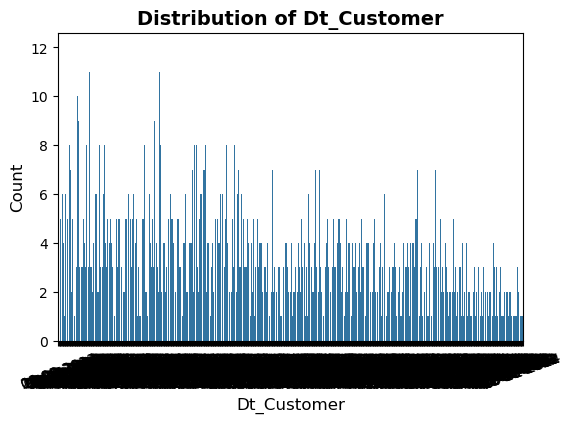

In [23]:
for col in cat:
    plt.figure(figsize=(6, 4))  # Individual figure for each plot
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=20)
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12124\2423389404.py:5: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  customer_joined_per_year = df1.groupby(by="Year", axis=0)[['ID']].count()


<Axes: xlabel='YEAR', ylabel='CUSTOMER_JOINED'>

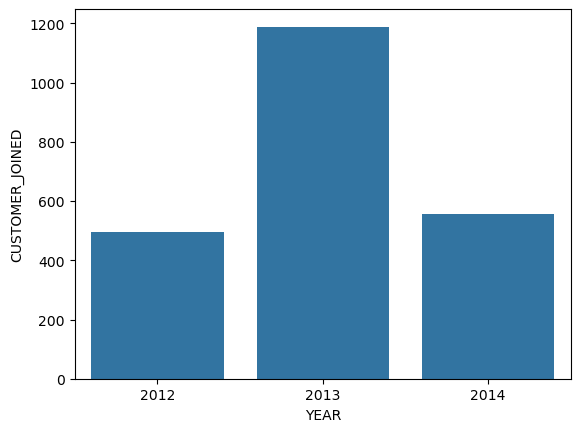

In [26]:
# Count of features based on years 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y", dayfirst=True)
df1 = df.copy()
df1["Year"] = df1.Dt_Customer.dt.year
customer_joined_per_year = df1.groupby(by="Year", axis=0)[['ID']].count()
customer_joined_per_year = customer_joined_per_year.reset_index()
customer_joined_per_year.columns = ['YEAR','CUSTOMER_JOINED']
sns.barplot(data = customer_joined_per_year, x = customer_joined_per_year['YEAR'], y = customer_joined_per_year['CUSTOMER_JOINED'])

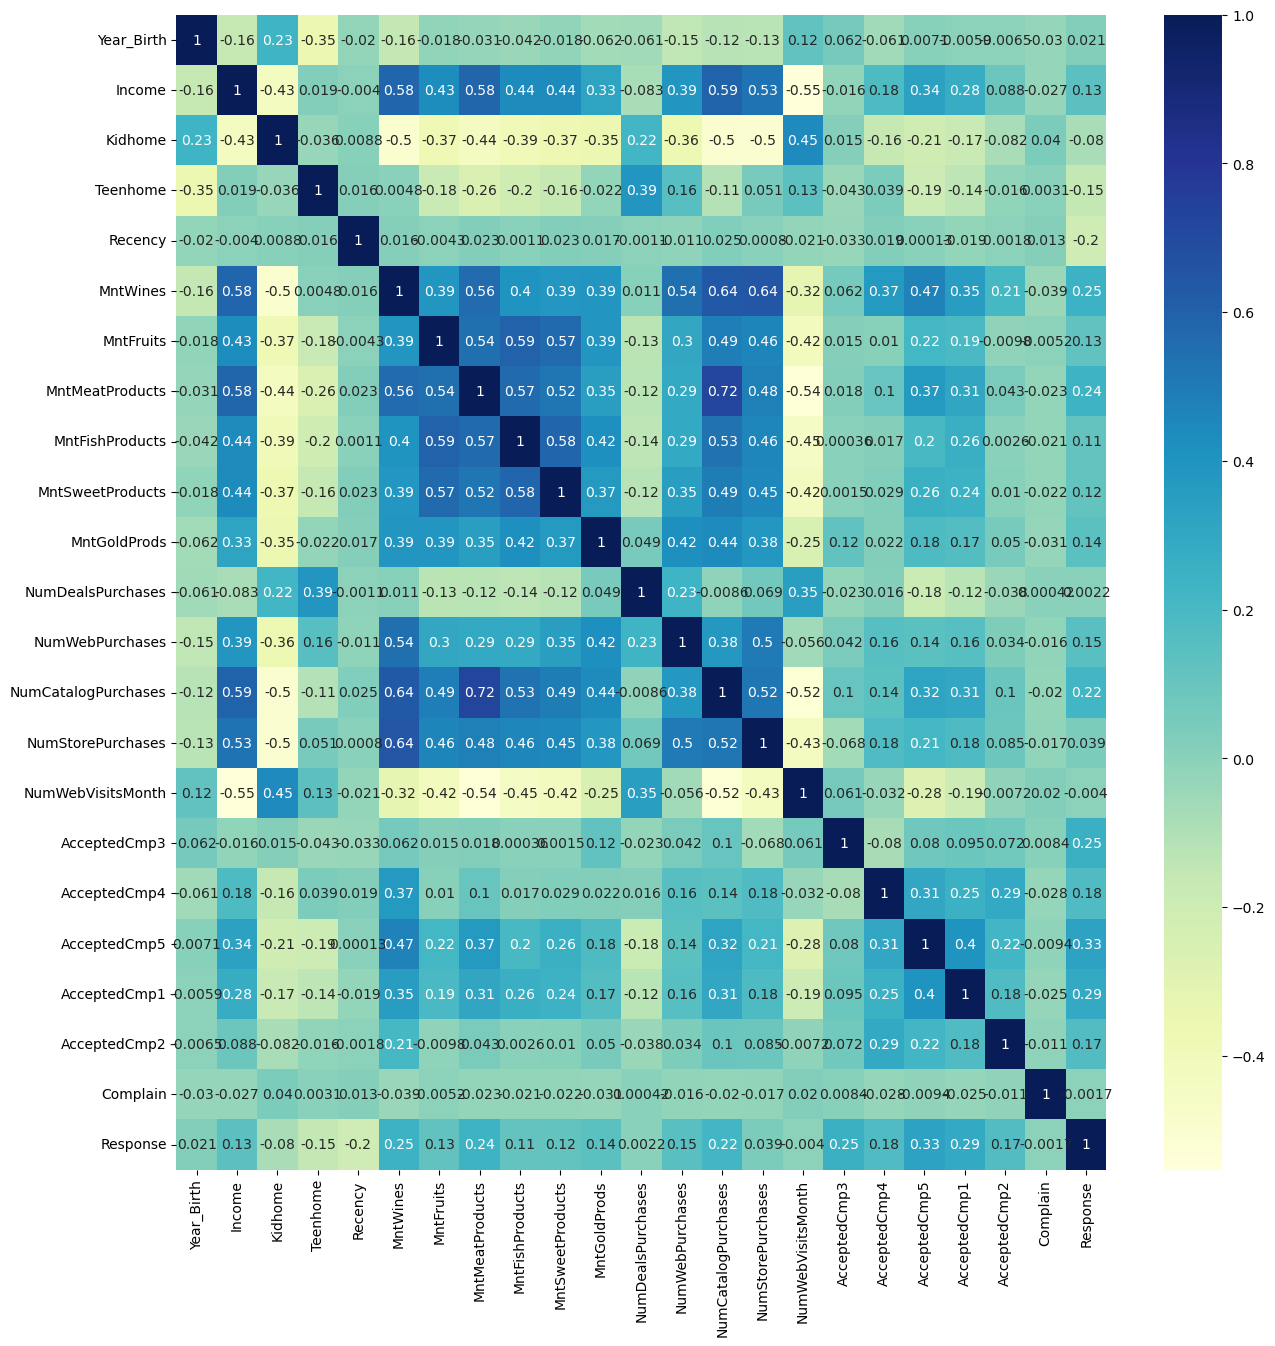

In [29]:
plt.figure(figsize=(15,15))
num_features = num.copy()
num_features.remove('Z_CostContact')
num_features.remove('Z_Revenue')
sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [30]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [31]:
# Filling missing values in the 'Income' column with median income
df['Income'].fillna(df['Income'].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12124\1724502549.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [34]:
df["Age"]=2025-df['Year_Birth']
df['Age']

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2240, dtype: int64

Text(0.5, 0, '\nAge')

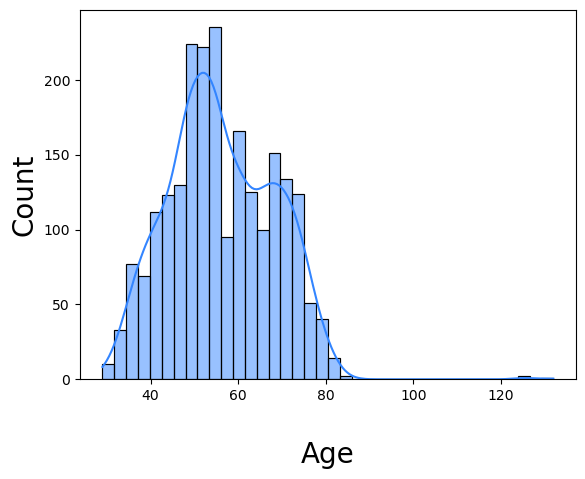

In [41]:
sns.histplot(data=df['Age'],color="#3385ff",kde=True,edgecolor="black")
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)

We have seen that this dataset has outliers in Wines, Fruits, Meat, Fish, Sweets, Gold, Age, Total_Spending columns and multicollinearity in Total_Spending,Wines,Fruits,Meat,Fish,Sweets,Gold columns. So we have to handle those in feature engineering steps.

- We have dropped the ID column as it is not going to participate in any model building task

- The column Z_CostContact, Z_Revenue does have constant values. As this columns does not have any varience, we have dropped this column

- There are some columns which individually does not have such meaning, so in feature engineering we'll retrieve new columns.

## Exploratory Data Analysis (EDA)

We explore the data to identify patterns, distributions, and relationships between features like income and spending.

## Model Building and Clustering

We use **KMeans clustering** to divide customers into distinct groups. We'll use the **Elbow Method** and **Silhouette Score** to find the optimal number of clusters.

## Conclusion

- We successfully segmented customers into meaningful clusters using KMeans.
- These clusters can help in designing targeted marketing strategies.

**Next steps**:
- Try different clustering methods like DBSCAN or Hierarchical Clustering
- Include additional customer attributes for better segmentation

## Exploratory Data Analysis (EDA)

We explore the data to identify patterns, distributions, and relationships between features like income and spending.

## Model Building and Clustering

We use **KMeans clustering** to divide customers into distinct groups. We'll use the **Elbow Method** and **Silhouette Score** to find the optimal number of clusters.

## Conclusion

- We successfully segmented customers into meaningful clusters using KMeans.
- These clusters can help in designing targeted marketing strategies.

**Next steps**:
- Try different clustering methods like DBSCAN or Hierarchical Clustering
- Include additional customer attributes for better segmentation